In [1]:
%%time
print("start")
%run -i 'myimports.py'
# %run -i "youtube_extraction.py"
# %run -i "nlp_processing.py"
%run -i "timestamp_generation"

nlp = spacy.load('en_core_web_sm')



#get collection of documents (minute of podcast) in a list
file = "3Lex/#101|Joscha_Bach|Artificial_Consciousness_and_the_Nature_of_Reality.txt"
document_size = 1000
topic_size = 2000

dictionary, model = generate_model(file, document_size, topic_size)
doc = nlp(open(file).read())
sents = list(doc.sents)

top_confi = load_confidences(file, topic_size, dictionary, model, sents)


#need to optimize number of topics in a document, how many previous sentences and after sentences will current sentence be compared to, alpha and beta values for LDA


#Each sentence topic probability will be compared to previous x number of sentence topics before and after


start
CPU times: user 12.4 s, sys: 4.23 s, total: 16.6 s
Wall time: 20.4 s


In [2]:
one_topic_confi = np.empty((len(sents), 2)) #extract main topic per sentence, keep only confident sentences
for i in range(len(sents)):
    cur = [(ind,j) for ind, j in enumerate(top_confi[:,i]) if j>.55]
    if not cur:
        one_topic_confi[i]=np.array((-1,-1))
    else: 
        one_topic_confi[i]=np.array((cur[0]))



In [4]:
for ind, i in enumerate(one_topic_confi): #basic
    
    if np.array_equal(i, [-1,-1]):
        print(i)
        neighborhood = np.array([arr for arr in one_topic_confi[max(0, ind-3):min(len(sents), ind+3)] if arr[0]!=-1])
        print(ind, neighborhood[:,0],stats.mode(neighborhood[:,0])[0])
#         print([j for j in one_topic_confi[max(0, ind-3):min(len(sents), ind+3)][:,1] if j!=-1])
        conf_neigh = np.array([arr[1] for arr in one_topic_confi[max(0, ind-3):min(len(sents), ind+3)] if arr[0]==stats.mode(neighborhood[:,0])[0]])
        print(ind, conf_neigh,np.average(conf_neigh))
        one_topic_confi[ind] = np.array([int(stats.mode(neighborhood[:,0])[0]), np.average(conf_neigh)])
#         print("set", np.array([int(stats.mode(neighborhood[:,0])[0]), np.average(conf_neigh)]))
        print(one_topic_confi[ind], "\n")

for ind, i in enumerate(one_topic_confi):
    top_confi[int(i[0])][ind] = i[1]

In [5]:
for ind, i in enumerate(one_topic_confi): #basic
#     print(ind, len(sents))
    if i[0]!= one_topic_confi[max(0, ind-1)][0] or i[0]!= one_topic_confi[min(len(sents)-1, ind+1)][0]: #if sent topic is not equal to one of its sides
        neigh_mode = one_topic_confi[max(0, ind-3):min(len(sents), ind+3)+1] #neighborhood of irregular sent
        if i[0]!=stats.mode(neigh_mode[:,0])[0] and np.count_nonzero(neigh_mode[:,0] == stats.mode(neigh_mode[:,0])[0])>4: #if there is a clear mode in neighborhood, and if element is not in the mode
#             print("this")
#             print(ind, neigh_mode)
            conf_neigh = np.array([arr[1] for arr in neigh_mode if arr[0]==stats.mode(neigh_mode[:,0])[0]]) #confidences of neighborhood mode
#             print(neigh_mode[:,1])
#             print(conf_neigh)
#             print(stats.mode(neigh_mode[:,0])[0],np.average(conf_neigh),"\n") #
            one_topic_confi[ind] = np.array([stats.mode(neigh_mode[:,0])[0],np.average(conf_neigh)]) #sent sentence topic equal to mode topic and confidence of mode topic
for ind, i in enumerate(one_topic_confi):
    top_confi[int(i[0])][ind] = i[1]

In [11]:
for ind, i in enumerate(one_topic_confi): #basic
#     print(ind, len(sents))
    if i[0]!= one_topic_confi[max(0, ind-1)][0] or i[0]!= one_topic_confi[min(len(sents)-1, ind+1)][0]: #if sent topic is not equal to one of its sides
        neigh_mode = one_topic_confi[max(0, ind-3):min(len(sents), ind+3)+1] #neighborhood of irregular sent
#         print(ind, neigh_mode, "\n")
for ind, i in enumerate(one_topic_confi):
    top_confi[int(i[0])][ind] = i[1]

In [6]:
breaks = ["So can we try to reverse engineer your mind a little bit?",
         "So what is your sense in the philosophical?",
         "Do you think of computation and computer science and you kind of represent that to me?",
         "Can you talk about what is dualism or does idealism or is materialism?",
          "But why does the simulation feel like something?",
          "But what is the connection between the the brain, the mind and the broader universe which comes first, which is more fundamental?",
          "So have you ever seen artificial intelligence or any kind of construction idea that allows for unlike neural networks or perhaps within neural networks, that is able to form something where the space of concepts continues to be integrated?",
          "What kind of mechanisms might we move towards to improve the learning procedure?",
          "or so that you discovered this?",
          "The spirit of the civilization is the entirety of this civilization may not exist for long.",
          "The dopamine rush of the like, no matter how like I consider I tried to be very kind of Zen like and minimalist and not be influenced by likes and so on.",
          "What kind of mechanisms of government do you think we as a species should be evolving with us?",
          "So what is the trajectory out of self-destruction, do you think?",
          "What is the most beautiful to you, silly ape, the most beautiful, surprising idea in the development of artificial intelligence, whether in your own life or in the history of artificial intelligence that you have come across.",
          "All the competitors in the game are improving gradually.",
          "I think I think it is a compelling notion, but it discards quietly or at least makes implicit the fact that you need to have something like common sense reasoning to walk."
          "Do you think that ajai systems that we try to create or greater intelligence systems would need to have a body?",
          "How does that change the fundamentals of the zeroth order in the first order?",
          "If you can directly access all of Wikipedia in trying to understand what is the best form of government, then every thought will not be stuck in a like every thought that requires some extra piece of information will be able to grab it really quickly.",
          "But in the context of the mind, what is the role of emotion and what is it?",
          "So do you think suffering is fundamental to happiness along these lines, suffering as the result of caring about things that you cannot change?Z"        
         ]


timestamp_array = np.zeros([2193, 1])
for ind, sent in enumerate(sents):
    if next((True for single in breaks if sent.text in single), False):
        print(ind)
        timestamp_array[ind] =1

29
114
220
363
562
615
758
823
922
941
1193
1266
1297
1387
1502
1540
1612
1695
1718
1754
1878
1895
2023
2036


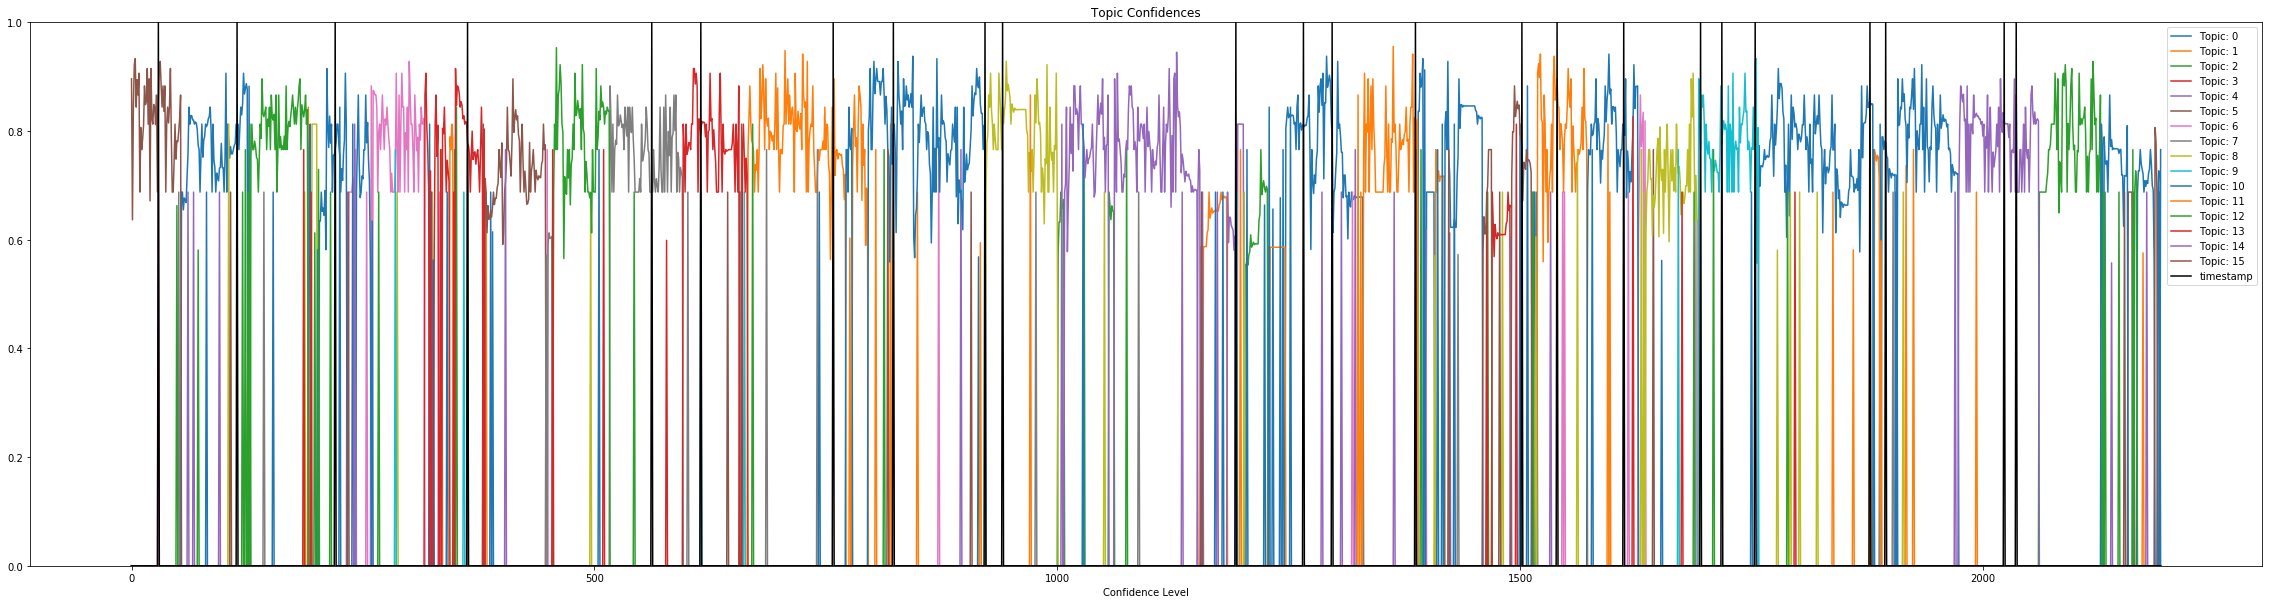

In [8]:
x = np.arange(0, len(sents))
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xlabel("Confidence Level")
plt.ylim(0,1)
for i in range(int(pod_word_count(file)/topic_size)):
    plt.plot(x,top_confi[i], label="Topic: "+str(i))
plt.plot(x, timestamp_array, label="timestamp", color="black")
plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

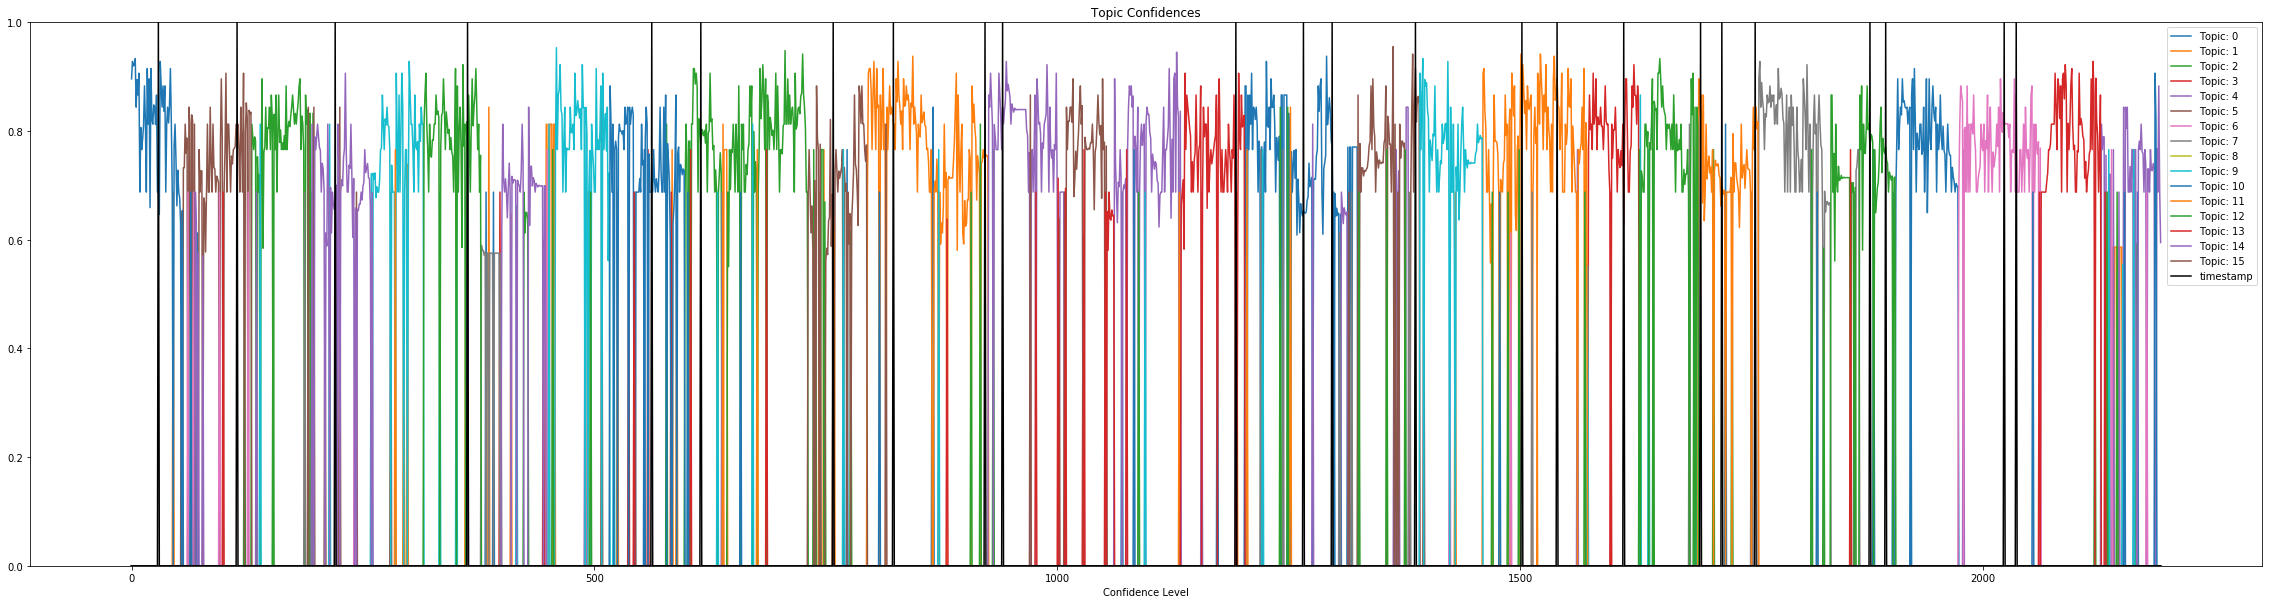

In [10]:
x = np.arange(0, len(sents))
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xlabel("Confidence Level")
plt.ylim(0,1)
for i in range(int(pod_word_count(file)/topic_size)):
    plt.plot(x,top_confi[i], label="Topic: "+str(i))
plt.plot(x, timestamp_array, label="timestamp", color="black")
plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

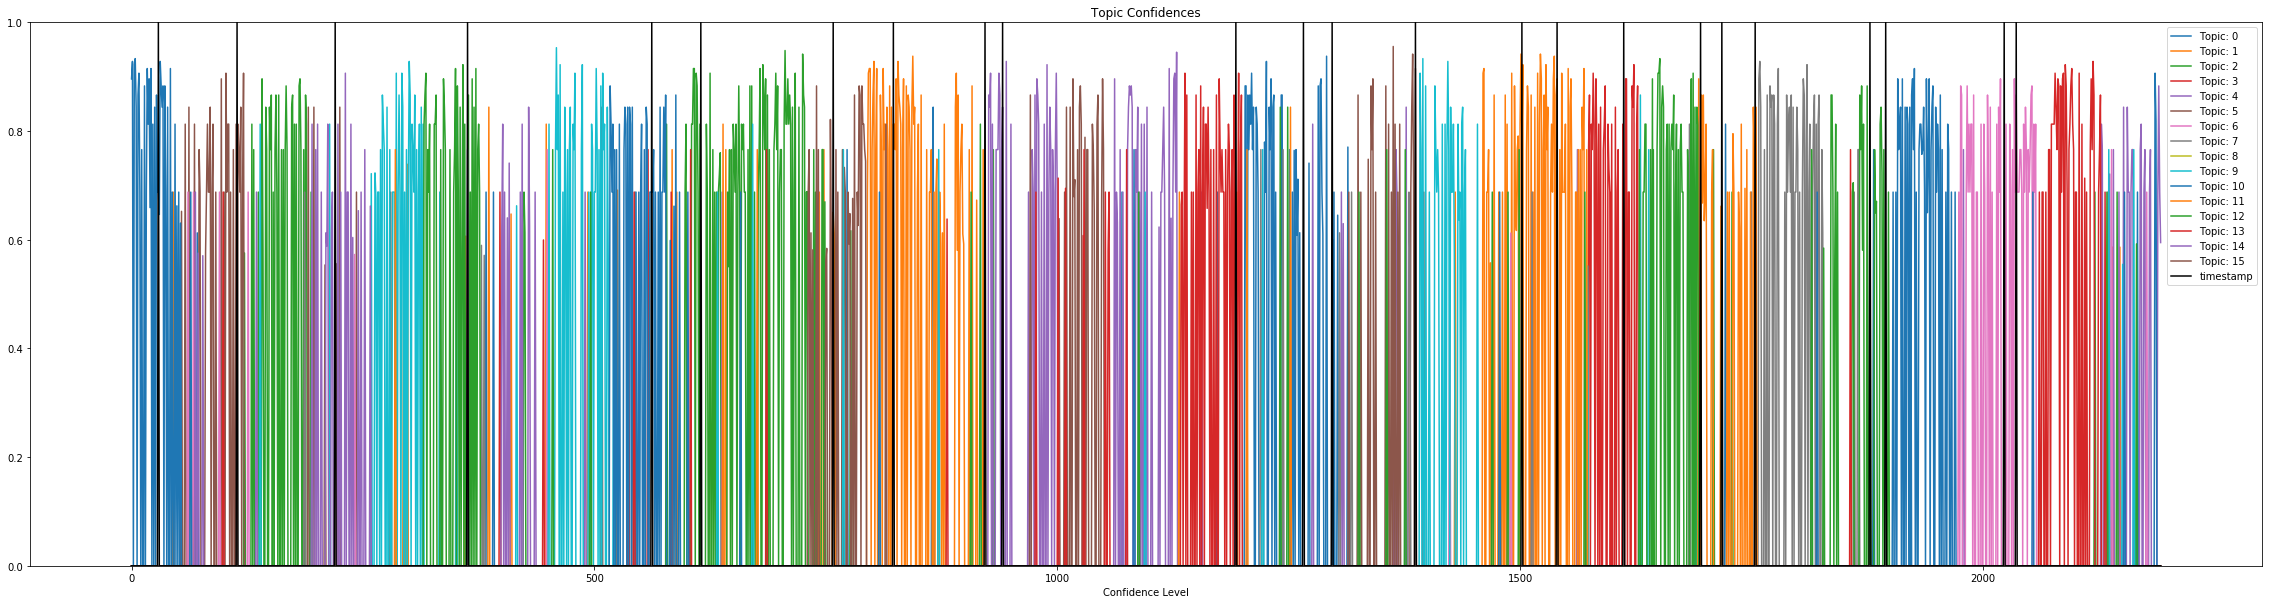

In [8]:
x = np.arange(0, len(sents))
plt.title("Topic Confidences")
plt.xlabel("Sentence Number")
plt.xlabel("Confidence Level")
plt.ylim(0,1)
for i in range(int(pod_word_count(file)/topic_size)):
    plt.plot(x,top_confi[i], label="Topic: "+str(i))
plt.plot(x, timestamp_array, label="timestamp", color="black")
plt.legend()
plt.rcParams['figure.figsize'] = [40, 10]
plt.show()

In [7]:
#scraping timestamp seperators
with open("Archive/text_files/htmlstuff.txt", "r") as r:
    soup = BeautifulSoup(r.read(), "html.parser")
to_find = file[5:-4].replace("_"," ").split("|")
for epi in soup.find_all(class_='hsp-card-episode'):
    if to_find[1] and to_find[2] in epi.get("title"): 
        to_scrape = epi.get("href")

main = "https://www.happyscribe.com" 
soup = BeautifulSoup(requests.get(main+to_scrape).text,"html.parser")


In [133]:
def convert_time(string):
    arr = string.split(":")
    
    if len(arr) ==2:
        middle = "0"+arr[0] if len(arr[0])==1 else arr[0]
        return "00:"+middle+":"+arr[1]
    elif len(arr)==3:
        hour = "0"+arr[0] if len(arr[0])==1 else arr[0]
        return hour+":"+arr[1]+":"+arr[2]
convert_time("19:43")


'00:19:43'

In [ ]:
for para in soup.find(class_="hsp-episode-transcript-body").find_all(class_="hsp-paragraph"):
    print(convert_time(para.find(title="Timestamp").text[1:-1]))
    print(para.find(class_="hsp-paragraph-words").text, "\n")